# A/B Testing
<br>

Small Project on A/B testing using Data from Kaggle

<br>

*link:* https://www.kaggle.com/datasets/osuolaleemmanuel/ad-ab-testing

#### Columns Description
**auction_id**: the unique id of the online user who has been presented the BIO. In standard terminologies this is called an impression id. The user may see the BIO questionnaire but choose not to respond. In that case both the yes and no columns are zero.

**experiment**: which group the user belongs to - control or exposed.
- *control*: users who have been shown a dummy ad
- *exposed*: users who have been shown a creative, an online interactive ad, with the SmartAd brand.

**date**: the date in YYYY-MM-DD format

**hour**: the hour of the day in HH format.

**device_make**: the name of the type of device the user has e.g. Samsung

**platform_os**: the id of the OS the user has.

**browser**: the name of the browser the user uses to see the BIO questionnaire.

**yes**: 1 if the user chooses the “Yes” radio button for the BIO questionnaire.

**no**: 1 if the user chooses the “No” radio button for the BIO questionnaire.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [17]:
plt.style.use("ggplot")

## Data

In [2]:
df = pd.read_csv("kaggle_data.csv")

In [3]:
df.head()

,auction_id,experiment,date,hour,device_make,platform_os,browser,yes,no
0,0008ef63-77a7-448b-bd1e-075f42c55e39,exposed,2020-07-10,8,Generic Smartphone,6,Chrome Mobile,0,0
1,000eabc5-17ce-4137-8efe-44734d914446,exposed,2020-07-07,10,Generic Smartphone,6,Chrome Mobile,0,0
2,0016d14a-ae18-4a02-a204-6ba53b52f2ed,exposed,2020-07-05,2,E5823,6,Chrome Mobile WebView,0,1
3,00187412-2932-4542-a8ef-3633901c98d9,control,2020-07-03,15,Samsung SM-A705FN,6,Facebook,0,0
4,001a7785-d3fe-4e11-a344-c8735acacc2c,control,2020-07-03,15,Generic Smartphone,6,Chrome Mobile,0,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8077 entries, 0 to 8076
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   auction_id   8077 non-null   object
 1   experiment   8077 non-null   object
 2   date         8077 non-null   object
 3   hour         8077 non-null   int64 
 4   device_make  8077 non-null   object
 5   platform_os  8077 non-null   int64 
 6   browser      8077 non-null   object
 7   yes          8077 non-null   int64 
 8   no           8077 non-null   int64 
dtypes: int64(4), object(5)
memory usage: 568.0+ KB


In [5]:
df.describe()

,hour,platform_os,yes,no
count,8077.000000,8077.000000,8077.000000,8077.000000
mean,11.615080,5.947134,0.070818,0.083075
std,5.734879,0.224333,0.256537,0.276013
min,0.000000,5.000000,0.000000,0.000000
25%,7.000000,6.000000,0.000000,0.000000
50%,13.000000,6.000000,0.000000,0.000000
75%,15.000000,6.000000,0.000000,0.000000
max,23.000000,7.000000,1.000000,1.000000


In [7]:
df.describe(include = "O")

,auction_id,experiment,date,device_make,browser
count,8077,8077,8077,8077,8077
unique,8077,2,8,269,15
top,0008ef63-77a7-448b-bd1e-075f42c55e39,control,2020-07-03,Generic Smartphone,Chrome Mobile
freq,1,4071,2015,4743,4554


## Data Cleaning

In [12]:
no_answer_index = df.loc[(df.yes == 0) & (df.no == 0)].index

In [13]:
df.drop(no_answer_index, inplace = True)

In [31]:
df["choose_yes"] = df.yes.apply(lambda x: True if x == 1 else False)

In [32]:
df

,auction_id,experiment,date,hour,device_make,platform_os,browser,yes,no,choose_yes
2,0016d14a-ae18-4a02-a204-6ba53b52f2ed,exposed,2020-07-05,2,E5823,6,Chrome Mobile WebView,0,1,False
16,008aafdf-deef-4482-8fec-d98e3da054da,exposed,2020-07-04,16,Generic Smartphone,6,Chrome Mobile,1,0,True
20,00a1384a-5118-4d1b-925b-6cdada50318d,exposed,2020-07-06,8,Generic Smartphone,6,Chrome Mobile,0,1,False
23,00b6fadb-10bd-49e3-a778-290da82f7a8d,control,2020-07-08,4,Samsung SM-A202F,6,Facebook,1,0,True
27,00ebf4a8-060f-4b99-93ac-c62724399483,control,2020-07-03,15,Generic Smartphone,6,Chrome Mobile,0,1,False
...,...,...,...,...,...,...,...,...,...,...
8059,ffa08ff9-a132-4051-aef5-01a9c79367bc,exposed,2020-07-05,21,Generic Smartphone,6,Chrome Mobile,1,0,True
8063,ffb176df-ecd2-45d3-b05f-05b173a093a7,exposed,2020-07-04,1,Generic Smartphone,6,Chrome Mobile,1,0,True
8064,ffb79718-6f25-4896-b6b3-e58b80a6e147,control,2020-07-09,7,Generic Smartphone,6,Chrome Mobile,0,1,False
8069,ffca1153-c182-4f32-9e90-2a6008417497,control,2020-07-10,16,Generic Smartphone,6,Chrome Mobile,0,1,False


## Descriptives

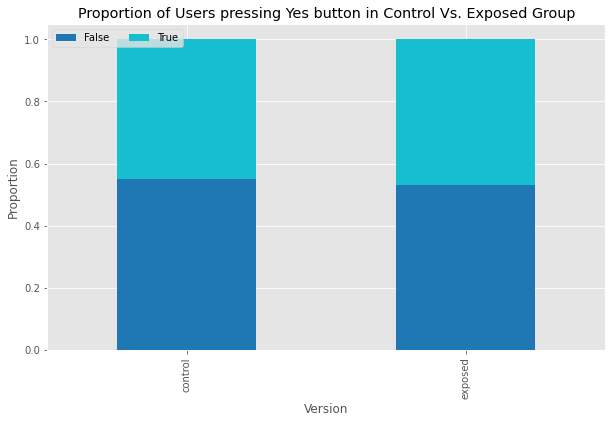

In [34]:
cross_tab_prop = pd.crosstab(index = df['experiment'],
                             columns = df['choose_yes'],
                             normalize = "index")
cross_tab_prop.plot(kind='bar', 
                    stacked=True, 
                    colormap='tab10', 
                    figsize=(10, 6))

plt.legend(loc="upper left", ncol=2)
plt.xlabel("Version")
plt.ylabel("Proportion")
plt.title("Proportion of Users pressing Yes button in Control Vs. Exposed Group")
plt.show()

In [57]:
df.groupby(["experiment","choose_yes"]).size().to_frame()

0
experiment choose_yes     
control    False       322
           True        264
exposed    False       349
           True        308

## A/B Testing

**KPI**: User pressing the "Yes" radio button in the BIO questionnaire

**Prior Assumption**: 50 % chance, since there are two buttons: yes or no. Relatively high uncertainty due to not accounting for drop off, i.e. not pressing any button.

**Prior Distribution Parameters**: alpha = 10, beta = 10

### 1. Goal

See whether or not being exposed to the creative, online interactive ad, with the SmartAd brand, increases the probability of pressing the "Yes" button in the questionnaire

### 2. Setting Prior

In [90]:
prior_alpha = 30
prior_beta = 30
prior = np.random.beta(prior_alpha, prior_beta, 10000)

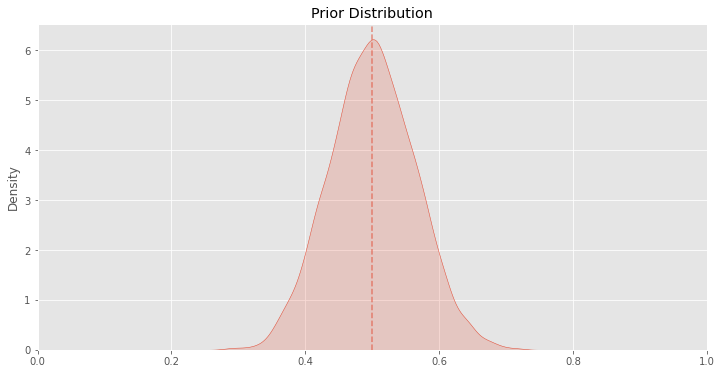

In [103]:
plt.figure(figsize = (12,6))
sns.kdeplot(prior, fill = True, alpha = 0.2)
plt.title("Prior Distribution")
plt.xlim(0,1)
plt.axvline(prior.mean(), linestyle='--', alpha = 0.6)
plt.show()

### Data Collection

In [92]:
df.groupby(["experiment","choose_yes"]).size()

experiment  choose_yes
control     False         322
            True          264
exposed     False         349
            True          308
dtype: int64

In [93]:
control_true = df.loc[df.experiment == "control"].choose_yes.sum()
control_true

264

In [94]:
control_false = len(df.loc[df.experiment == "control"].choose_yes) - control_true
control_false

322

In [95]:
exposed_true = df.loc[df.experiment == "exposed"].choose_yes.sum()
exposed_true

308

In [96]:
exposed_false = len(df.loc[df.experiment == "exposed"].choose_yes) - exposed_true
exposed_false

349

### Simulate Distribution

In [97]:
control_posterior = np.random.beta(prior_alpha + control_true, prior_beta + control_false, 10000)
exposed_posterior = np.random.beta(prior_alpha + exposed_true, prior_beta + exposed_false, 10000)

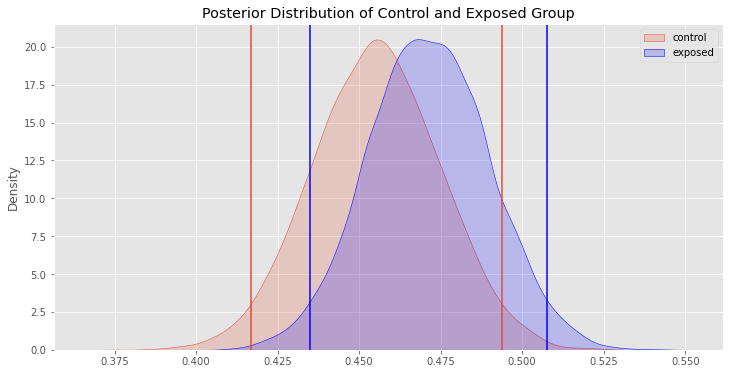

In [110]:
plt.figure(figsize = (12,6))

sns.kdeplot(control_posterior, label = "control", fill = True, alpha = 0.2)
plt.axvline(control_posterior.mean() - control_posterior.std() * 1.96)
plt.axvline(control_posterior.mean() + control_posterior.std() * 1.96)

sns.kdeplot(exposed_posterior, label = "exposed", fill = True, alpha = 0.2, color = "blue")
plt.axvline(exposed_posterior.mean() - exposed_posterior.std() * 1.96, color = "blue")
plt.axvline(exposed_posterior.mean() + exposed_posterior.std() * 1.96, color = "blue")



plt.legend()
plt.title("Posterior Distribution of Control and Exposed Group")

plt.show()

### Decision Making

In [99]:
diff = exposed_posterior - control_posterior
prob = (diff > 0).sum() / len(diff)
print(f"Probability of Exposed Group 'beating' Control Group in Terms of pressing Yes in the Questinnaire is {round(prob*100, 2)}%")



Probability of Exposed Group 'beating' Control Group in Terms of pressing Yes in the Questinnaire is 72.14%


In [100]:
lift = (diff / control_posterior).mean()
print(f"On Average, Exposed Group is {round(lift*100,2)}% more likely to press Yes in Questionnaire")

On Average, Exposed Group is 3.72% more likely to press Yes in Questionnaire


**Decision:**
<br>
Since the probability of the exposed group beating the control group is less than 95 %, we cannot statistically determine that the new version generates a higher probability of pressing Yes in the questionnaire. Hence, we will not recommend client to implement the change.